In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(suppress=True,  # 지수 표기법 억제 (예: 1e-10 대신 0.0000000001로 표시)
                    precision=8)    # 소수점 이하 자리수를 8자리로 표현

# 데이터 준비

In [2]:
hitter1 = pd.read_csv('data/2000_2001_hitter.csv')
hitter2 = pd.read_csv('data/2002_2013_hitter.csv')
hitter3 = pd.read_csv('data/2014_hitter.csv')

# hitter1 = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/refs/heads/main/2000_2001_hitter.csv')
# hitter2 = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/refs/heads/main/2002_2013_hitter.csv')
# hitter3 = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/refs/heads/main/2014_hitter.csv')

print(f'hitter1 >>> {hitter1.shape}')
print(f'hitter2 >>> {hitter2.shape}')
print(f'hitter3 >>> {hitter3.shape}')

display(hitter1.head(3))
display(hitter2.head(3))
display(hitter3.head(3))

hitter1 >>> (89, 36)
hitter2 >>> (505, 39)
hitter3 >>> (55, 39)


,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,H,...,OBP,SLG,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,2000박종호,2000,1,박종호,현대,0.340,121,541,441,150,...,0.428023,0.489796,0.917819,0.149660,0.297052,0.976667,100.354529,8.286154,0.400138,92.804
1,2000김동주,2000,2,김동주,두산,0.339,127,539,469,159,...,0.413729,0.603412,1.017141,0.264392,0.379531,1.063830,115.473840,9.306847,0.431993,105.000
2,2000브리또,2000,3,브리또,SK,0.338,103,452,405,137,...,0.398664,0.533333,0.931997,0.195062,0.274074,0.931655,86.204956,8.224501,0.400969,77.820


,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,R,...,MH,RISP,PH-BA,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,2002장성호,2002,1,장성호,KIA,0.343,133,586,481,82,...,48,0.365,0.0,0.178794,0.365904,1.047904,116.003072,9.104892,0.412689,106.706
1,2002마해영,2002,2,마해영,삼성,0.323,133,596,532,92,...,53,0.313,0.0,0.268797,0.359023,1.002674,120.662819,8.573411,0.413068,110.578
2,2002이승엽,2002,3,이승엽,삼성,0.323,133,617,511,123,...,47,0.331,0.0,0.365949,0.538160,1.267409,157.375689,11.770481,0.468948,136.108


,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,R,...,MH,RISP,PH-BA,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,2014서건창,2014,1,서건창,넥센,0.370,128,616,543,135,...,66,0.390,0.0,0.176796,0.342541,1.097222,139.001623,10.254218,0.424498,120.634
1,2014김태균,2014,2,김태균,한화,0.365,118,508,422,66,...,44,0.354,0.0,0.199052,0.360190,1.100694,110.631890,10.194748,0.441970,97.816
2,2014손아섭,2014,3,손아섭,롯데,0.362,122,570,483,105,...,54,0.336,0.0,0.175983,0.356108,1.106918,125.666667,10.603125,0.428663,110.456


In [3]:
# 데이터프레임 병합 
hitter_concat = pd.concat([hitter1, hitter2, hitter3], 
                          ignore_index=True) # 기존 인덱스 무시
hitter_concat.tail()

,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,H,...,TA,RC,RC/27,wOBA,XR,R,SAC,MH,RISP,PH-BA
644,2014이범호,2014,51,이범호,KIA,0.269,105,406,350,94,...,0.884328,64.894286,6.441712,0.369291,63.468,47.0,0.0,24.0,0.293,0.000
645,2014모창민,2014,52,모창민,NC,0.263,122,468,419,110,...,0.676647,53.028291,4.138046,0.319970,55.644,62.0,8.0,22.0,0.263,0.667
646,2014오지환,2014,53,오지환,LG,0.262,113,464,397,104,...,0.818182,64.147759,5.463689,0.336344,63.404,72.0,6.0,21.0,0.359,0.000
647,2014조동화,2014,54,조동화,SK,0.262,125,522,443,116,...,0.539359,48.898621,3.520701,0.293759,48.544,74.0,28.0,26.0,0.328,0.143
648,2014김재호,2014,55,김재호,두산,0.252,122,421,341,86,...,0.620818,41.969406,3.867488,0.304498,44.468,50.0,13.0,21.0,0.298,0.000


In [4]:
# 변수 선택
X = hitter_concat[['OPS','ISO','SECA','TA','RC','RC/27','wOBA','XR']]
y = hitter_concat['YrPlayer']

print(X.shape, y.shape)
display(X.head())
display(y.head())


(649, 8) (649,)


,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,0.917819,0.149660,0.297052,0.976667,100.354529,8.286154,0.400138,92.804
1,1.017141,0.264392,0.379531,1.063830,115.473840,9.306847,0.431993,105.000
2,0.931997,0.195062,0.274074,0.931655,86.204956,8.224501,0.400969,77.820
3,1.031229,0.284188,0.423077,1.110092,119.916981,9.811389,0.436688,107.594
4,0.932665,0.231504,0.324582,0.923588,82.605677,7.125729,0.394586,80.284


0     2000박종호 
1     2000김동주 
2     2000브리또 
3     2000송지만 
4    2000데이비스 
Name: YrPlayer, dtype: object

<Axes: >

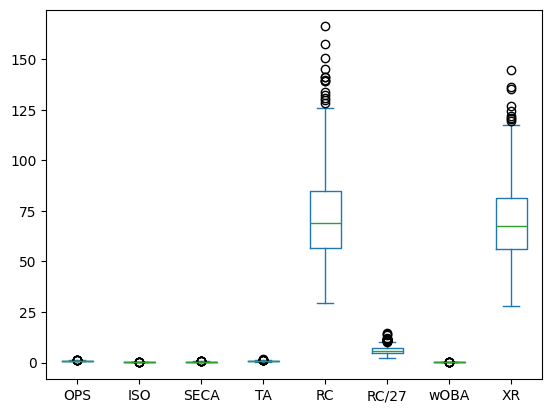

In [5]:
# 데이터 분포 확인
X.plot(kind='box')

In [8]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X.loc[:,'OPS':'XR'] = scaler.fit_transform(X)
X

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,0.976149,-0.074229,0.104176,1.108646,1.248725,1.204841,1.118807,1.214334
1,1.897116,1.679891,1.054165,1.654227,1.929967,1.758231,1.894866,1.857449
2,1.107616,0.619910,-0.160485,0.826902,0.611178,1.171415,1.139040,0.424202
3,2.027750,1.982543,1.555727,1.943794,2.130165,2.031780,2.009248,1.994235
4,1.113814,1.177062,0.421269,0.776410,0.449003,0.575692,0.983538,0.554133
...,...,...,...,...,...,...,...,...
644,0.412201,1.132233,1.026659,0.530672,-0.349031,0.204838,0.367294,-0.332603
645,-0.737598,-0.063556,-0.128516,-0.769272,-0.883686,-1.044144,-0.834318,-0.745176
646,-0.422330,-0.051699,0.773504,0.116640,-0.382668,-0.325418,-0.435385,-0.335978
647,-1.460858,-1.396013,-1.627267,-1.628601,-1.069759,-1.378851,-1.472888,-1.119570


<Axes: >

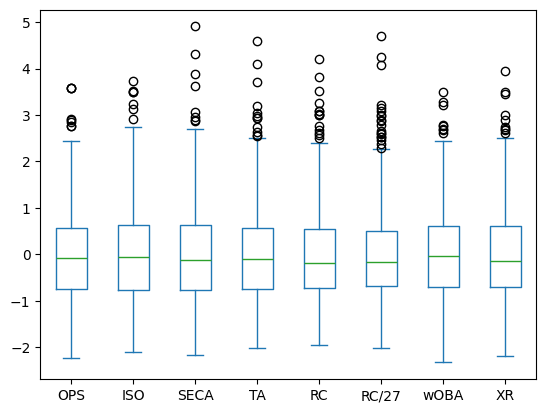

In [9]:
X.plot(kind='box')

# k-means clustering

### 최적의 k 찾기

[2225.7814969700885, 1335.431147224904, 1022.9114281177139, 850.9830883505114, 735.761309524121]


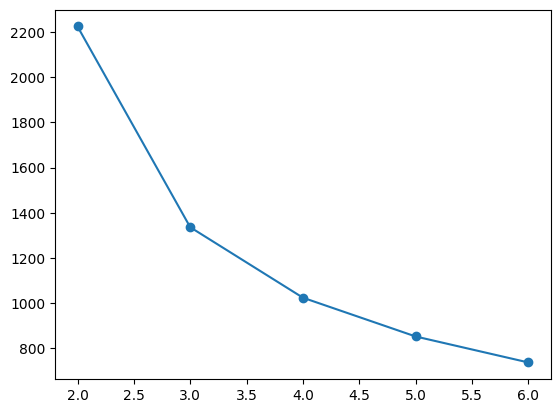

In [15]:

from sklearn.cluster import KMeans

# inertia_: 각 데이터 포인트와 그 데이터가 속한 군집의 중심점 사이의 거리 제곱합 
inertia = []
for n in range(2,7):
    km = KMeans(n_clusters=n)
    km.fit(X)
    inertia.append(km.inertia_)
print(inertia)

# 이너셔 시각화
plt.plot(range(2,7), inertia, marker='o');

### 군집화

실루엣 점수: 0.4795566842674775


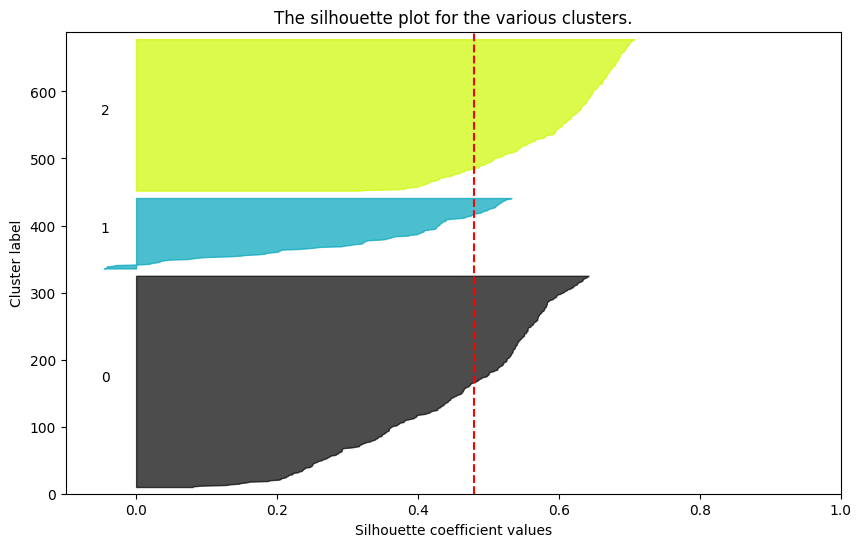

In [40]:
# 실루엣 점수
k=3
km = KMeans(n_clusters=k)
km.fit(X)

from sklearn.metrics import silhouette_score
print('실루엣 점수:', silhouette_score(X, km.labels_))

# 실루엣 시각화
import silhouette_analysis as s
s.silhouette_plot(X, k)

실루엣 점수: 0.3730240260949941


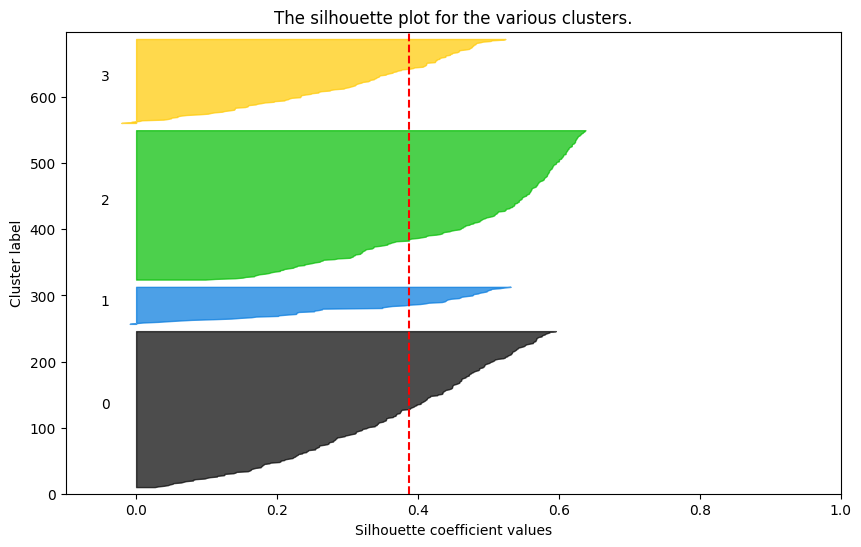

In [43]:
# 실루엣 점수
k=4
km = KMeans(n_clusters=k)
km.fit(X)

from sklearn.metrics import silhouette_score
print('실루엣 점수:', silhouette_score(X, km.labels_))

# 실루엣 시각화
import silhouette_analysis as s
s.silhouette_plot(X, k)

### 군집화 결과 분석

In [44]:
# 데이터프레임 생성
X['kmeans_cluster'] = km.labels_
X.head()

C:\Users\chopi\AppData\Local\Temp\ipykernel_28056\1011636420.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['kmeans_cluster'] = km.labels_


,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,kmeans_cluster
0,0.976149,-0.074229,0.104176,1.108646,1.248725,1.204841,1.118807,1.214334,0
1,1.897116,1.679891,1.054165,1.654227,1.929967,1.758231,1.894866,1.857449,2
2,1.107616,0.619910,-0.160485,0.826902,0.611178,1.171415,1.139040,0.424202,0
3,2.027750,1.982543,1.555727,1.943794,2.130165,2.031780,2.009248,1.994235,2
4,1.113814,1.177062,0.421269,0.776410,0.449003,0.575692,0.983538,0.554133,0


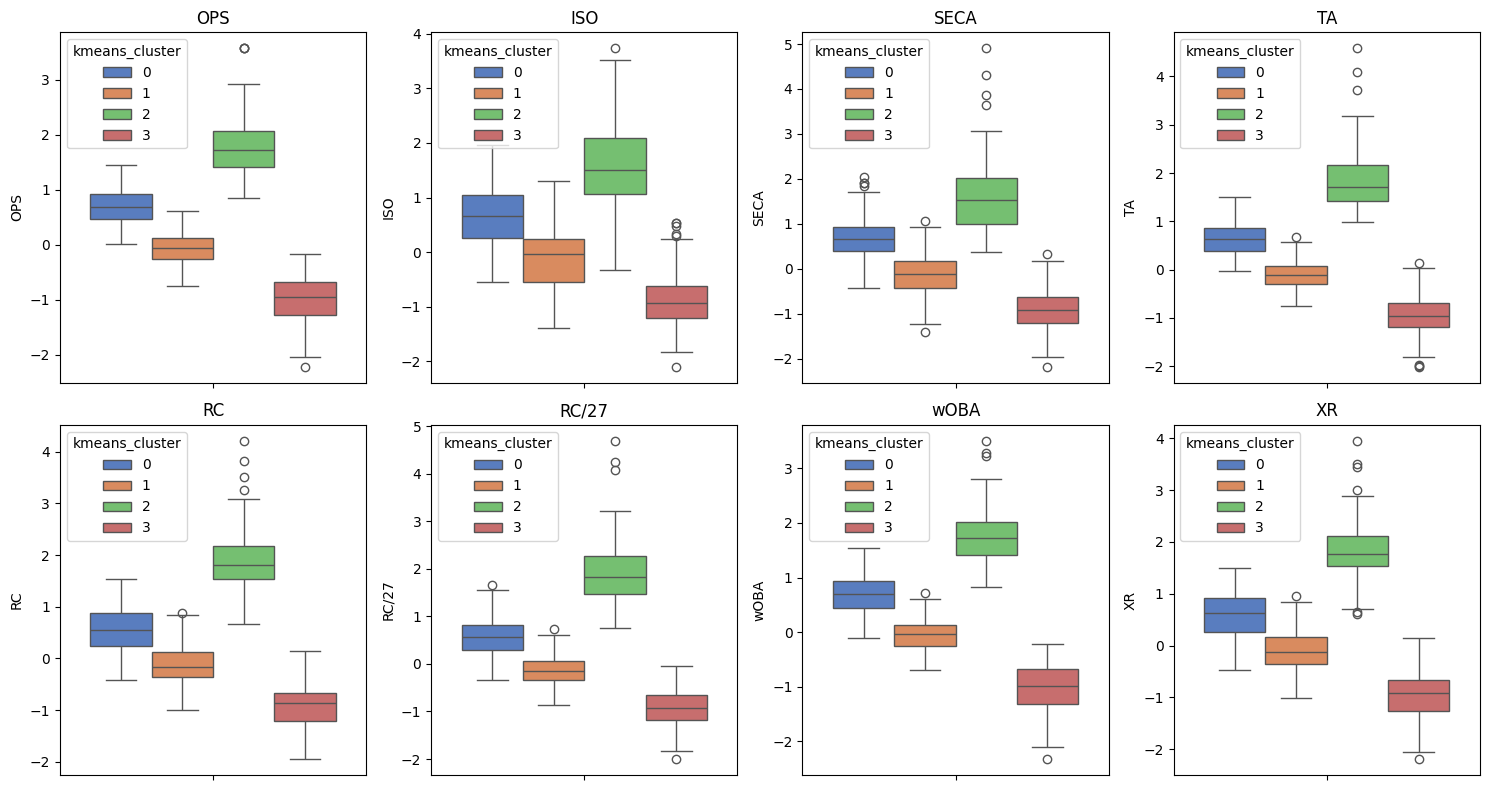

In [45]:
cols = X.columns[:-1]

plt.figure(figsize=(15,8))

for i, col in enumerate(cols):
    plt.subplot(2,4,i+1)
    sns.boxplot(data=X, y=col, hue='kmeans_cluster', palette='muted')
    plt.title(col)

plt.tight_layout()

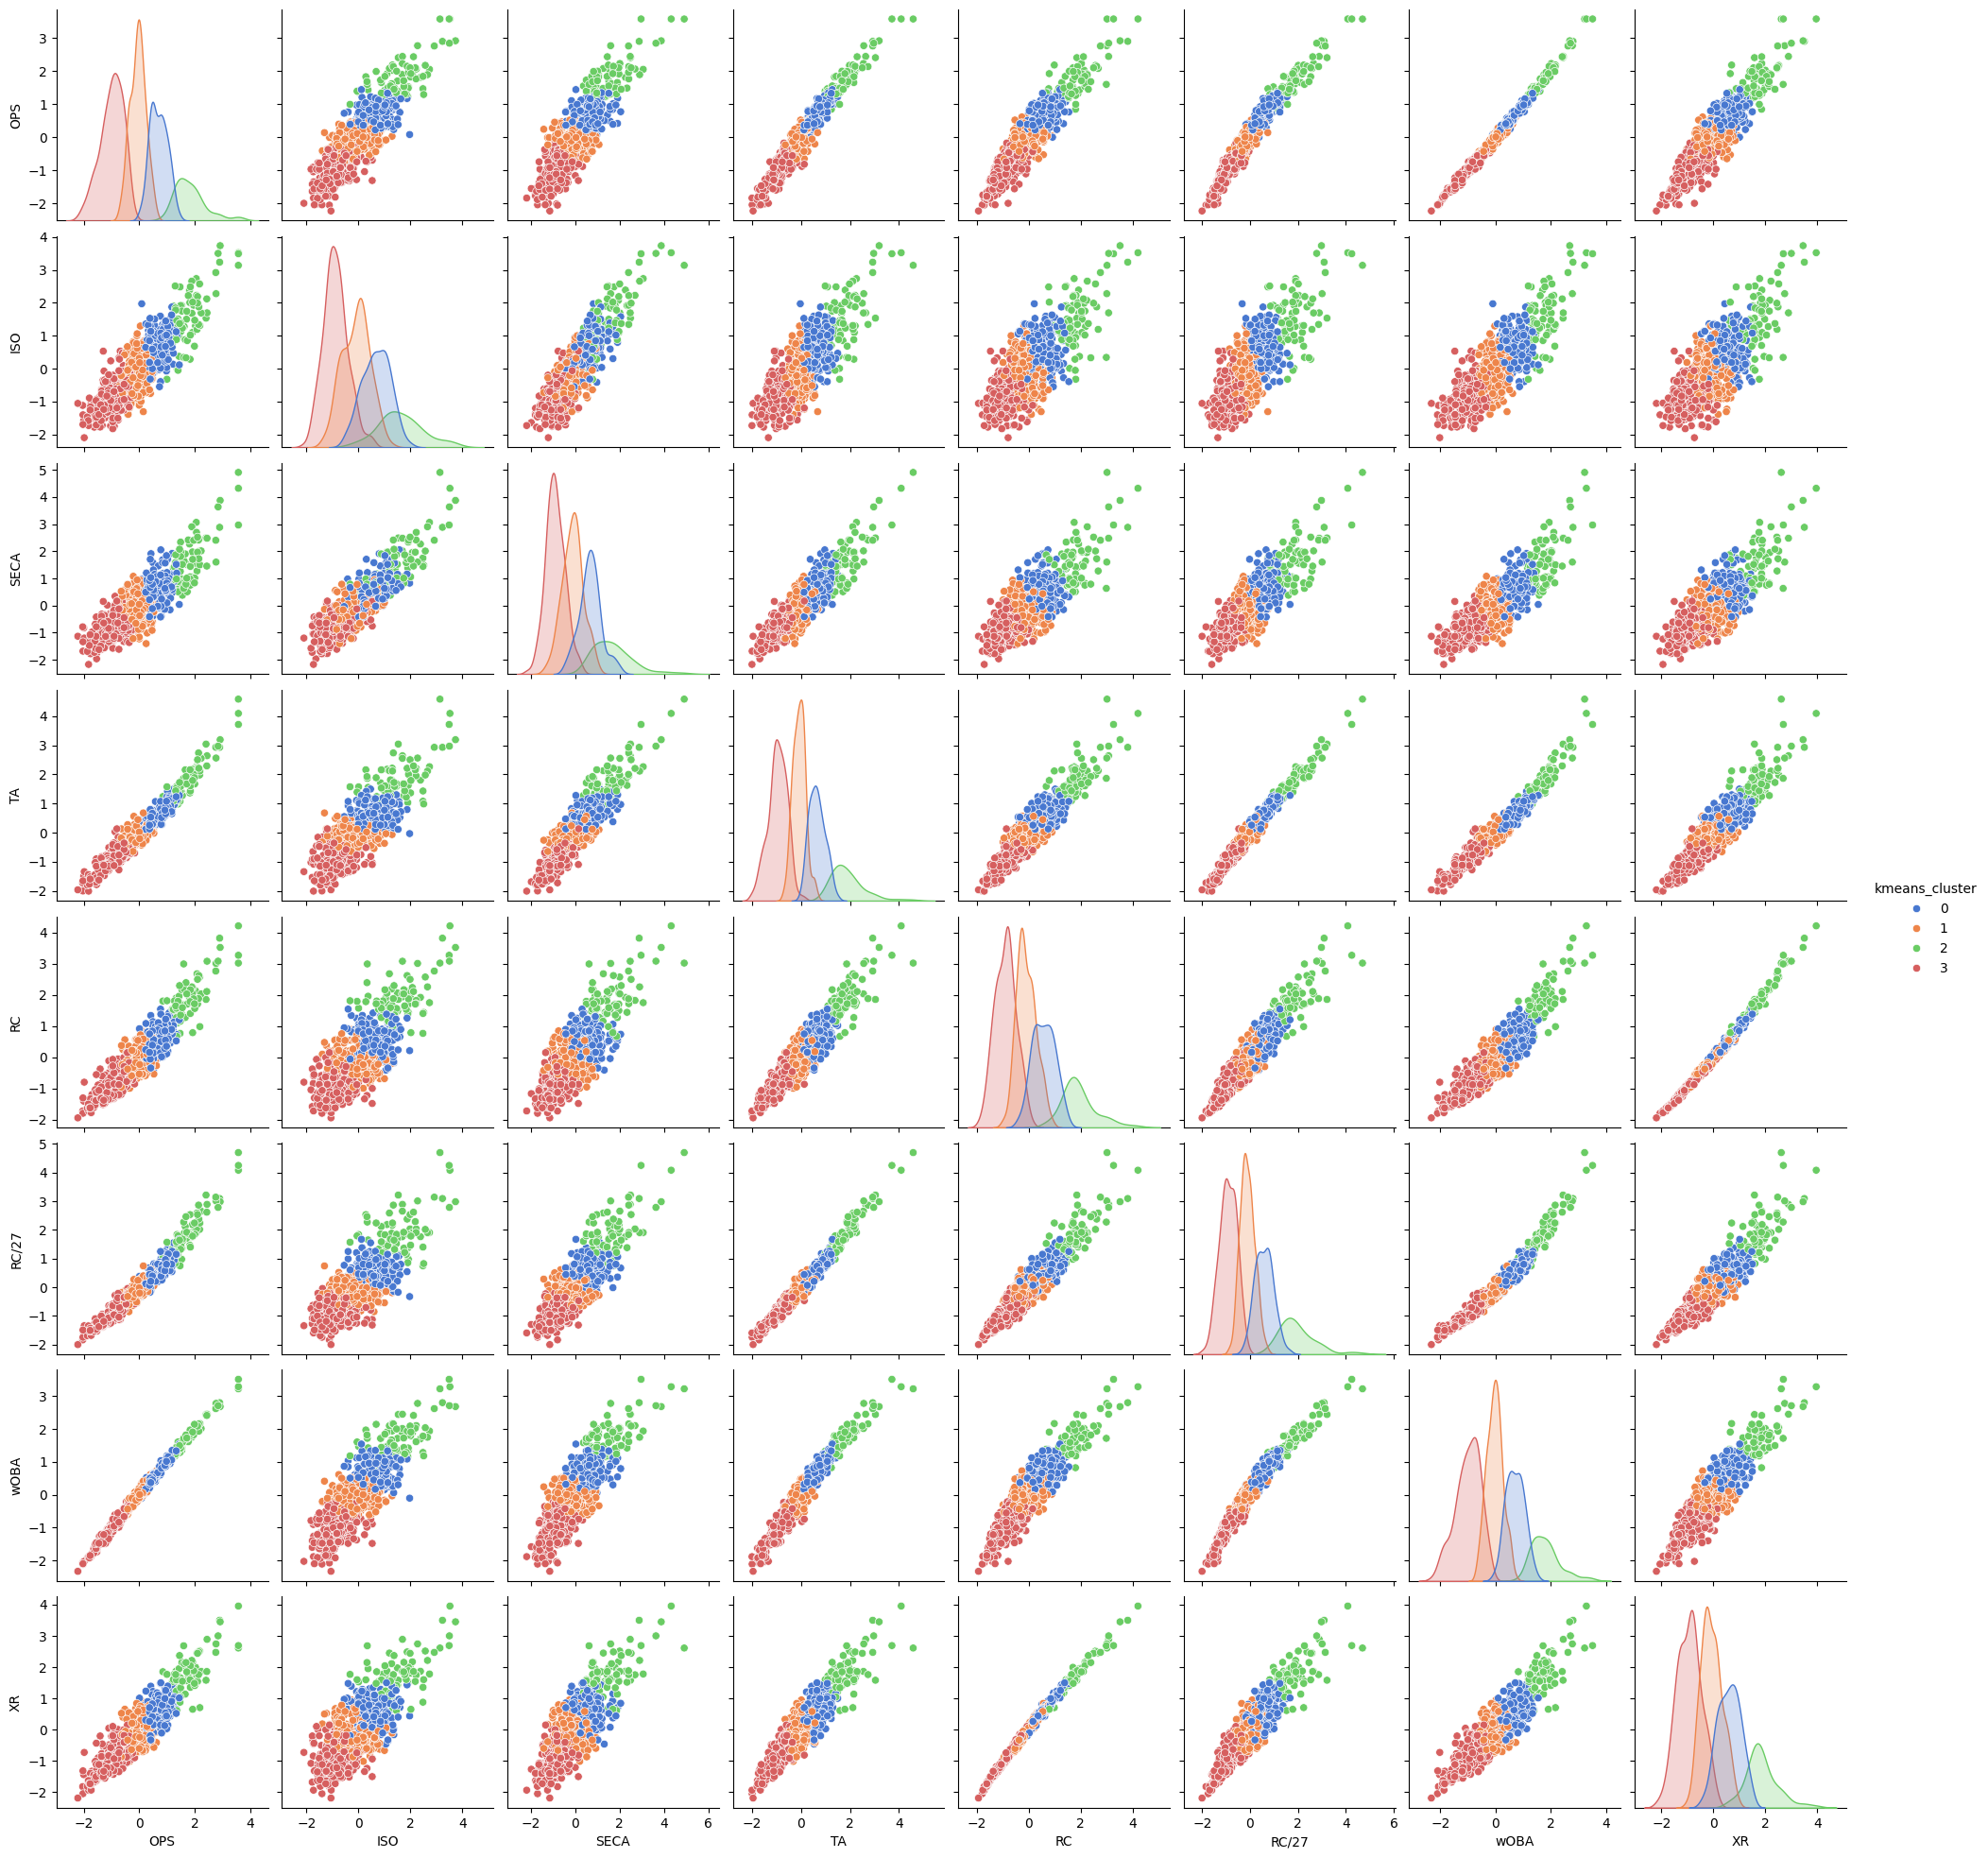

In [48]:
sns.pairplot(X, hue='kmeans_cluster', palette='muted')

In [52]:
# 개별 데이터 실루엣 계수 컬럼 추가
from sklearn.metrics import silhouette_samples
X['silhoutte'] = silhouette_samples(X.iloc[:,:8], km.labels_)

C:\Users\chopi\AppData\Local\Temp\ipykernel_28056\395476310.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['silhoutte'] = silhouette_samples(X.iloc[:,:8], km.labels_)


In [53]:
X

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,kmeans_cluster,silhoutte
0,0.976149,-0.074229,0.104176,1.108646,1.248725,1.204841,1.118807,1.214334,0,0.400015
1,1.897116,1.679891,1.054165,1.654227,1.929967,1.758231,1.894866,1.857449,2,0.447335
2,1.107616,0.619910,-0.160485,0.826902,0.611178,1.171415,1.139040,0.424202,0,0.402931
3,2.027750,1.982543,1.555727,1.943794,2.130165,2.031780,2.009248,1.994235,2,0.520774
4,1.113814,1.177062,0.421269,0.776410,0.449003,0.575692,0.983538,0.554133,0,0.496852
...,...,...,...,...,...,...,...,...,...,...
644,0.412201,1.132233,1.026659,0.530672,-0.349031,0.204838,0.367294,-0.332603,0,0.154921
645,-0.737598,-0.063556,-0.128516,-0.769272,-0.883686,-1.044144,-0.834318,-0.745176,3,0.221503
646,-0.422330,-0.051699,0.773504,0.116640,-0.382668,-0.325418,-0.435385,-0.335978,1,0.427985
647,-1.460858,-1.396013,-1.627267,-1.628601,-1.069759,-1.378851,-1.472888,-1.119570,3,0.551903


In [56]:
# 잘못 군집화 된 데이터
cond = X['silhoutte']<0
X.loc[cond]

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,kmeans_cluster,silhoutte
9,1.395062,1.507827,0.730896,0.980965,1.477069,1.159698,1.321978,1.420936,2,-0.054227
20,1.468378,2.480909,1.747379,1.078101,0.762602,0.746534,1.283194,0.875058,2,-0.084799
93,1.385821,1.284857,0.873615,1.340440,1.102252,1.466390,1.365648,1.093473,2,-0.076231
100,1.228187,1.898462,1.379617,1.030534,1.379926,0.853908,1.154385,1.487906,2,-0.022403
137,0.848012,0.701246,1.166835,1.238093,1.799189,1.026175,0.819944,1.850911,2,-0.112496
172,1.191097,0.772985,0.773688,1.160429,1.539421,1.324406,1.207516,1.536735,2,-0.105775
209,-0.477966,0.005753,-0.531666,-0.517653,-0.809760,-0.459834,-0.524358,-0.821109,3,-0.018382
218,1.339458,1.043044,1.092171,1.378643,1.269341,1.488217,1.295335,1.234266,2,-0.002892
235,-0.431603,-0.536286,-0.781690,-0.583976,-0.363499,-0.515643,-0.406754,-0.258146,3,-0.096400
247,-0.579964,0.092560,-0.508001,-0.753638,-0.284957,-0.712661,-0.727330,-0.332497,3,-0.083193


In [61]:
# 클러스터 별 중심 player
X['player'] = y

max_id = X.groupby('kmeans_cluster')['silhoutte'].idxmax()
X.loc[max_id]

C:\Users\chopi\AppData\Local\Temp\ipykernel_28056\3625732049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['player'] = y


,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,kmeans_cluster,silhoutte,player
626,0.922192,1.000493,0.626534,0.771725,0.840296,0.574636,0.891493,0.992439,0,0.540185,2014이택근
485,-0.069973,0.019323,-0.191782,-0.131594,-0.320208,-0.183055,-0.111013,-0.232518,1,0.574214,2011황재균
470,2.146172,1.873921,1.721852,2.208859,2.618612,2.375373,1.930496,2.485800,2,0.521736,2011최형우
325,-1.099228,-1.007645,-1.334422,-1.194599,-1.091820,-1.073170,-1.098797,-1.185063,3,0.595220,2007김민재


# 주성분분석

In [70]:
# 모든 특성(컬럼)에 대해 주성분 계산하여 각 데이터포인트를 주성분 공간으로 변환
from sklearn.decomposition import PCA
pca = PCA()
principal_components = pca.fit_transform(X.iloc[:,:8])
principal_components.shape

(649, 8)

In [71]:
# 컬럼별 설명된 분산비율율 확인
pca.explained_variance_ratio_

array([0.90514573, 0.05062617, 0.02188854, 0.0184561 , 0.00299299,
       0.00055624, 0.00018392, 0.00015031])

In [66]:
# 컬럼별 설명된 누적분산 확인
pca.explained_variance_ratio_.cumsum()

array([0.90514573, 0.95577189, 0.97766044, 0.99611654, 0.99910953,
       0.99966577, 0.99984969, 1.        ])

In [69]:
# 2개의 주성분으로 차원 축소
pca = PCA(n_components=2)
pca_X = pca.fit_transform(X.iloc[:,:8])
pca_X

array([[ 2.48864775, -1.29871071],
       [ 4.8638416 , -0.32843484],
       [ 2.05850718, -0.4397998 ],
       ...,
       [-0.3971905 ,  0.69084294],
       [-3.94087277, -0.42488303],
       [-3.33227219,  0.22550401]], shape=(649, 2))

실루엣 점수:0.43183378066194306


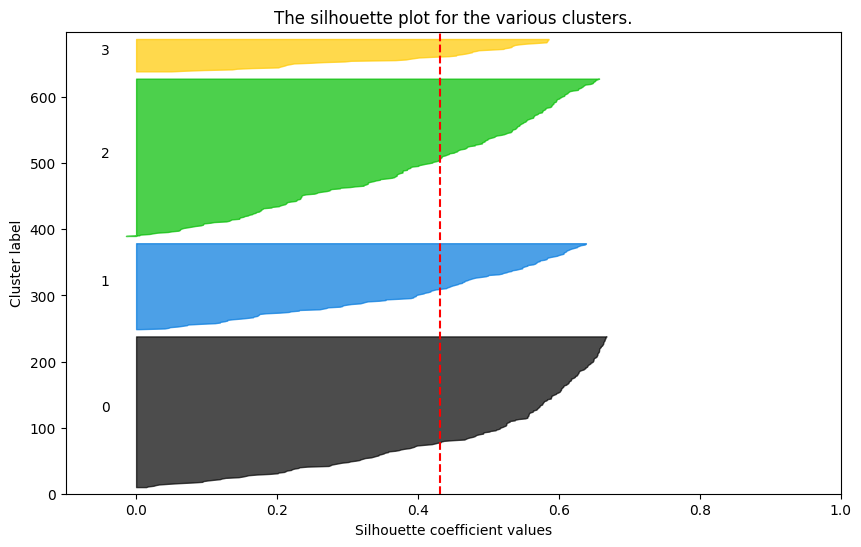

In [ ]:
# 주성분으로 군집화

# 실루엣 점수

# 실루엣 시각화

# PCA를 하거나 하지 않은 경우 군집 결과 비교